<font size='6'><b> Demo of advanced trianglechain functionality </b></font>

# setup

In [1]:
import sys, os, h5py, bz2, pylab as plt, importlib, seaborn, yaml, numpy as np, pickle, h5py
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import trianglechain
from trianglechain import TriangleChain

# generate some data

In [2]:
def get_samples(n_samples=10000, n_dims=4):
    covmat = np.random.normal(size=(n_dims, n_dims))
    covmat = np.dot(covmat.T,covmat)
    mean = np.random.uniform(size=(n_dims))
    samples = np.random.multivariate_normal(mean=mean, cov=covmat, size=(n_samples))
    from trianglechain.TriangleChain import ensure_rec
    samples = ensure_rec(samples, column_prefix='col')
    return samples

get data

In [3]:
n_dims = 6
samples1 = get_samples(n_samples=20000, n_dims=n_dims)
samples2 = get_samples(n_samples=20000, n_dims=n_dims)

get ranges for the plot

In [4]:
ranges = {f'col{i}': [-10,10] for i in range(n_dims)}

# contour plot with groups

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

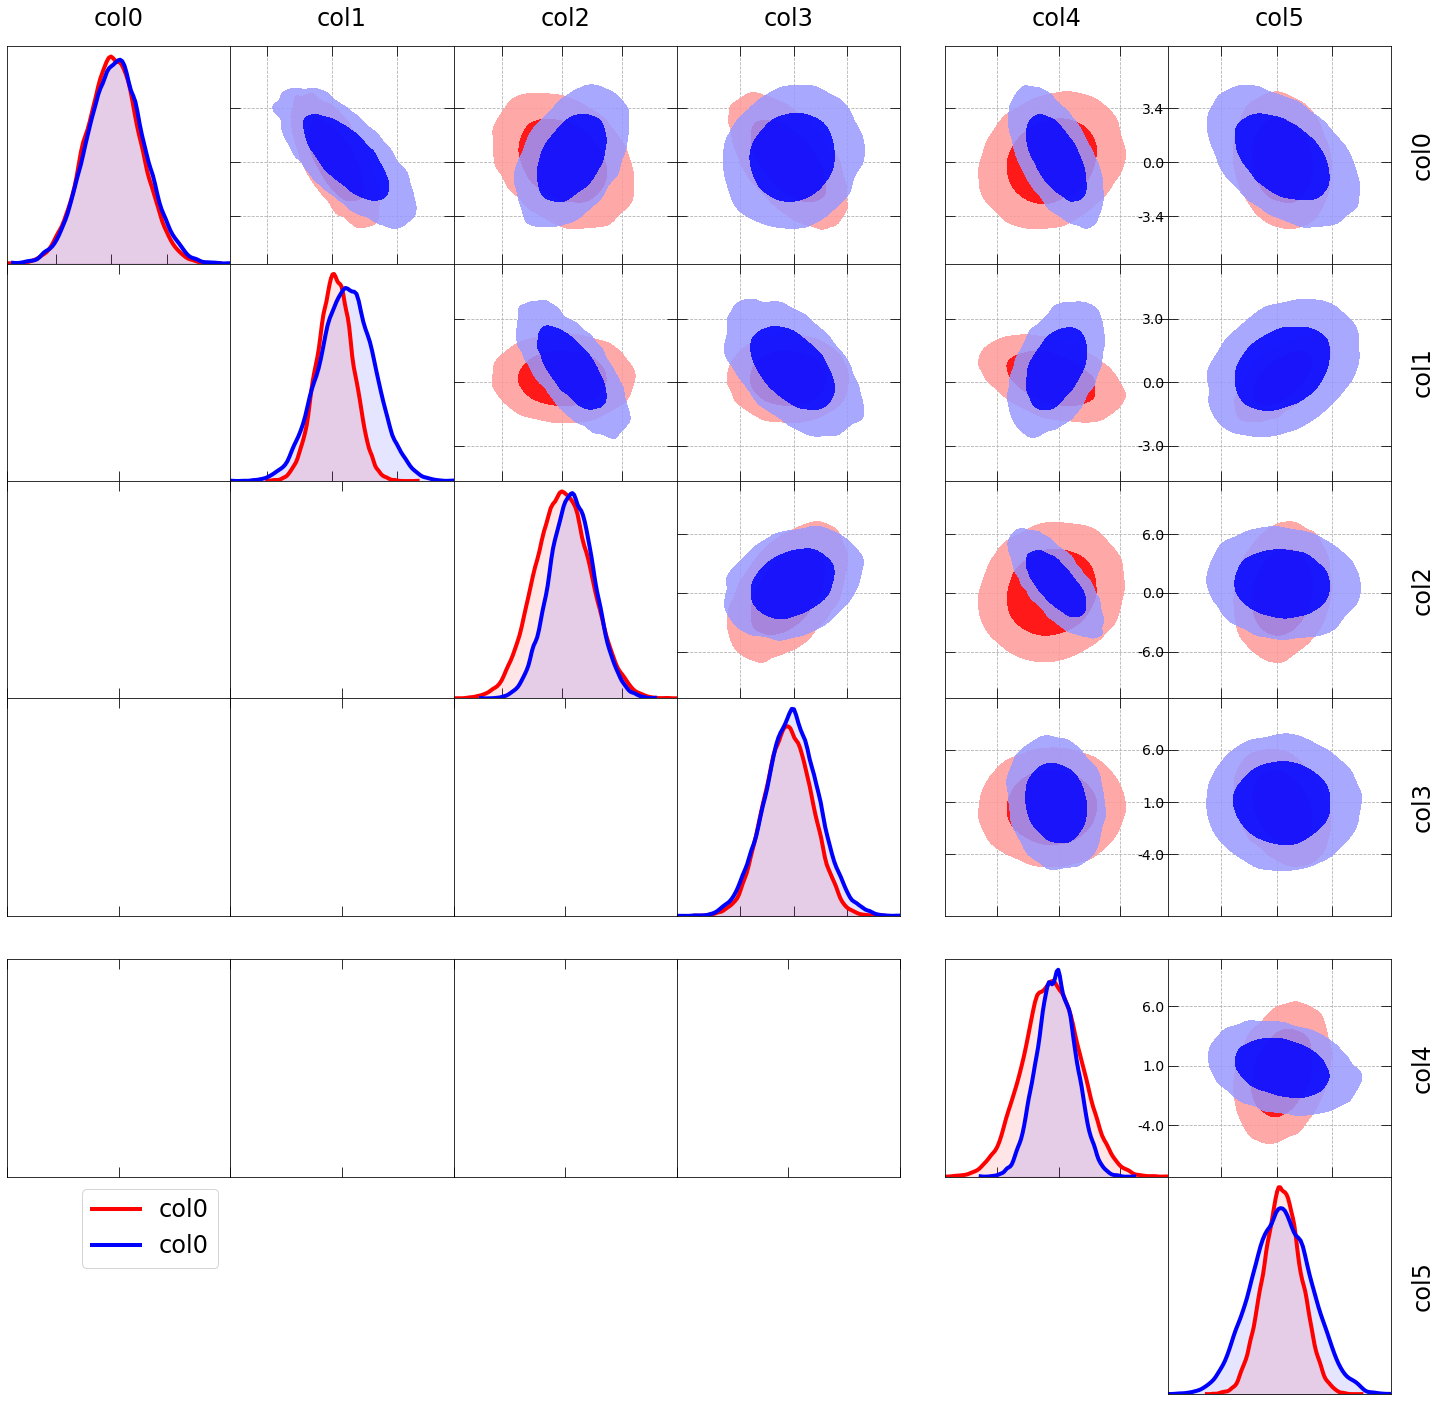

In [5]:
kwargs = {'n_ticks': 3, #number of ticks that are used
          'de_kwargs': {'smoothing_parameter2D': 0.3}, #how much the contours are smoothed, Default 0.1
          'grouping_kwargs': {'n_per_group': (4,2), #how to group parameters
                              'empty_ratio': 0.2}, #space between groups
          'fill': True,
          'grid': True,
         }

tri = TriangleChain(density_estimation_method='smoothing', n_bins=100, **kwargs)
tri.contour_cl(samples1, color='r',label='sample1', tri="upper");
tri.contour_cl(samples2, color='b',label='sample2', tri="upper", show_legend=True);

# contour plot with different parameter and different alpha

In [6]:
samples1 = get_samples(n_samples=20000, n_dims=4)
samples2 = get_samples(n_samples=20000, n_dims=2)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

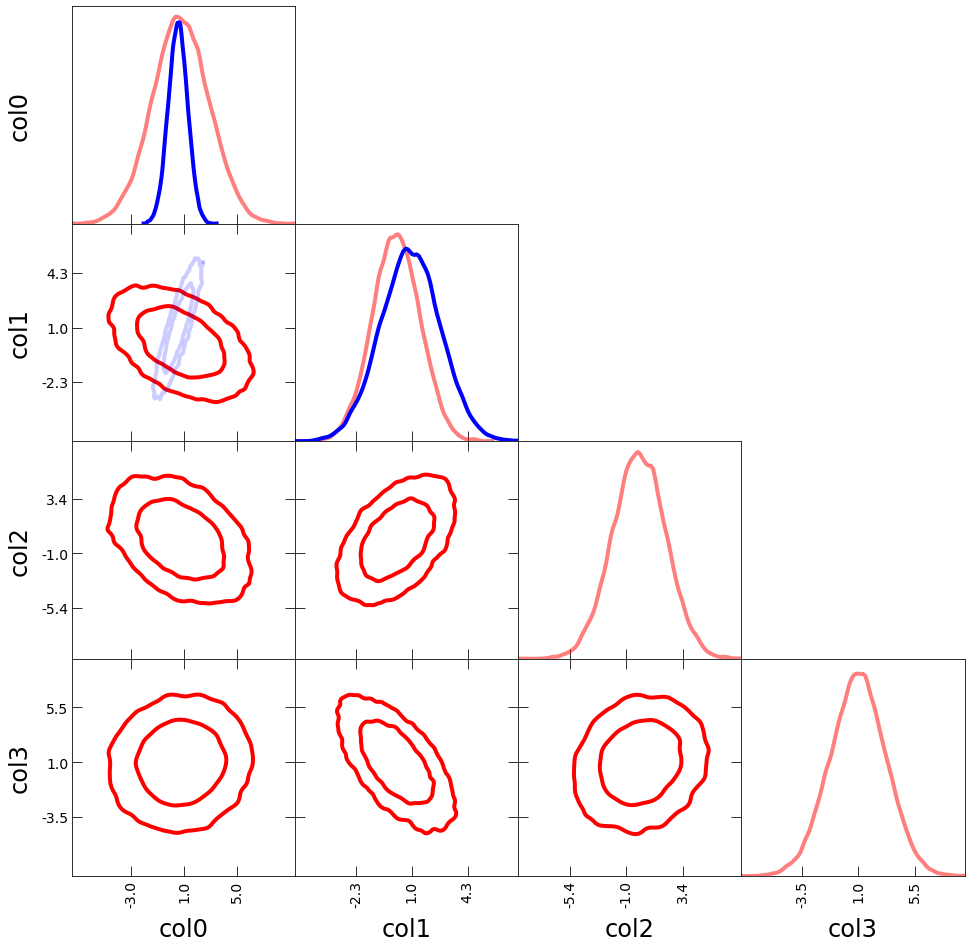

In [7]:
tri = TriangleChain(add_empty_plots_like = samples1)
tri.contour_cl(samples1, color='r', alpha1D=0.5);
tri.contour_cl(samples2, color='b', alpha2D=0.2);

# contour plot with only part of the parameters

In [8]:
n_dims = 6
samples1 = get_samples(n_samples=20000, n_dims=n_dims)
samples2 = get_samples(n_samples=20000, n_dims=n_dims)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

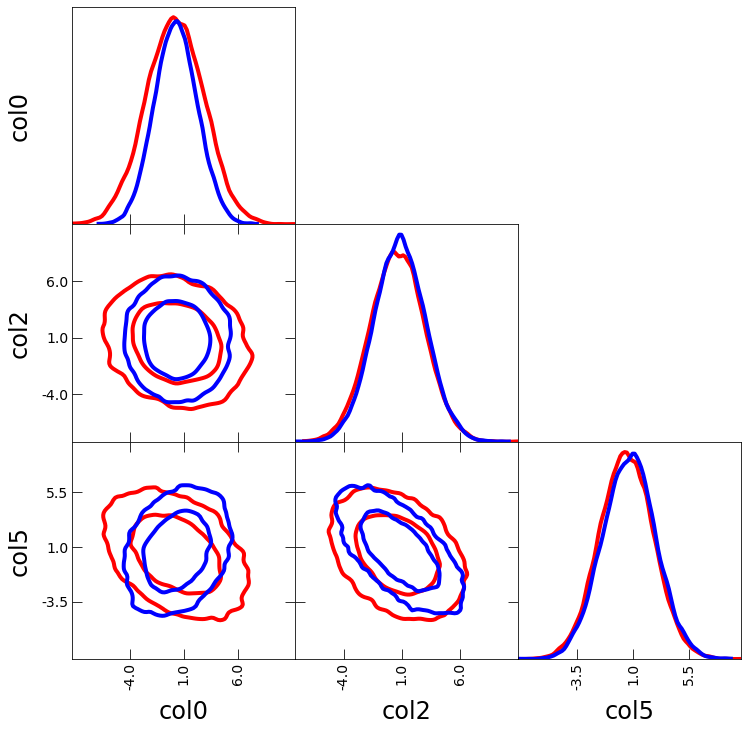

In [9]:
tri = TriangleChain(params=['col0','col2','col5'])
tri.contour_cl(samples1, color='r');
tri.contour_cl(samples2, color='b', label_levels1D=0.68);

# density image with alpha plot

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

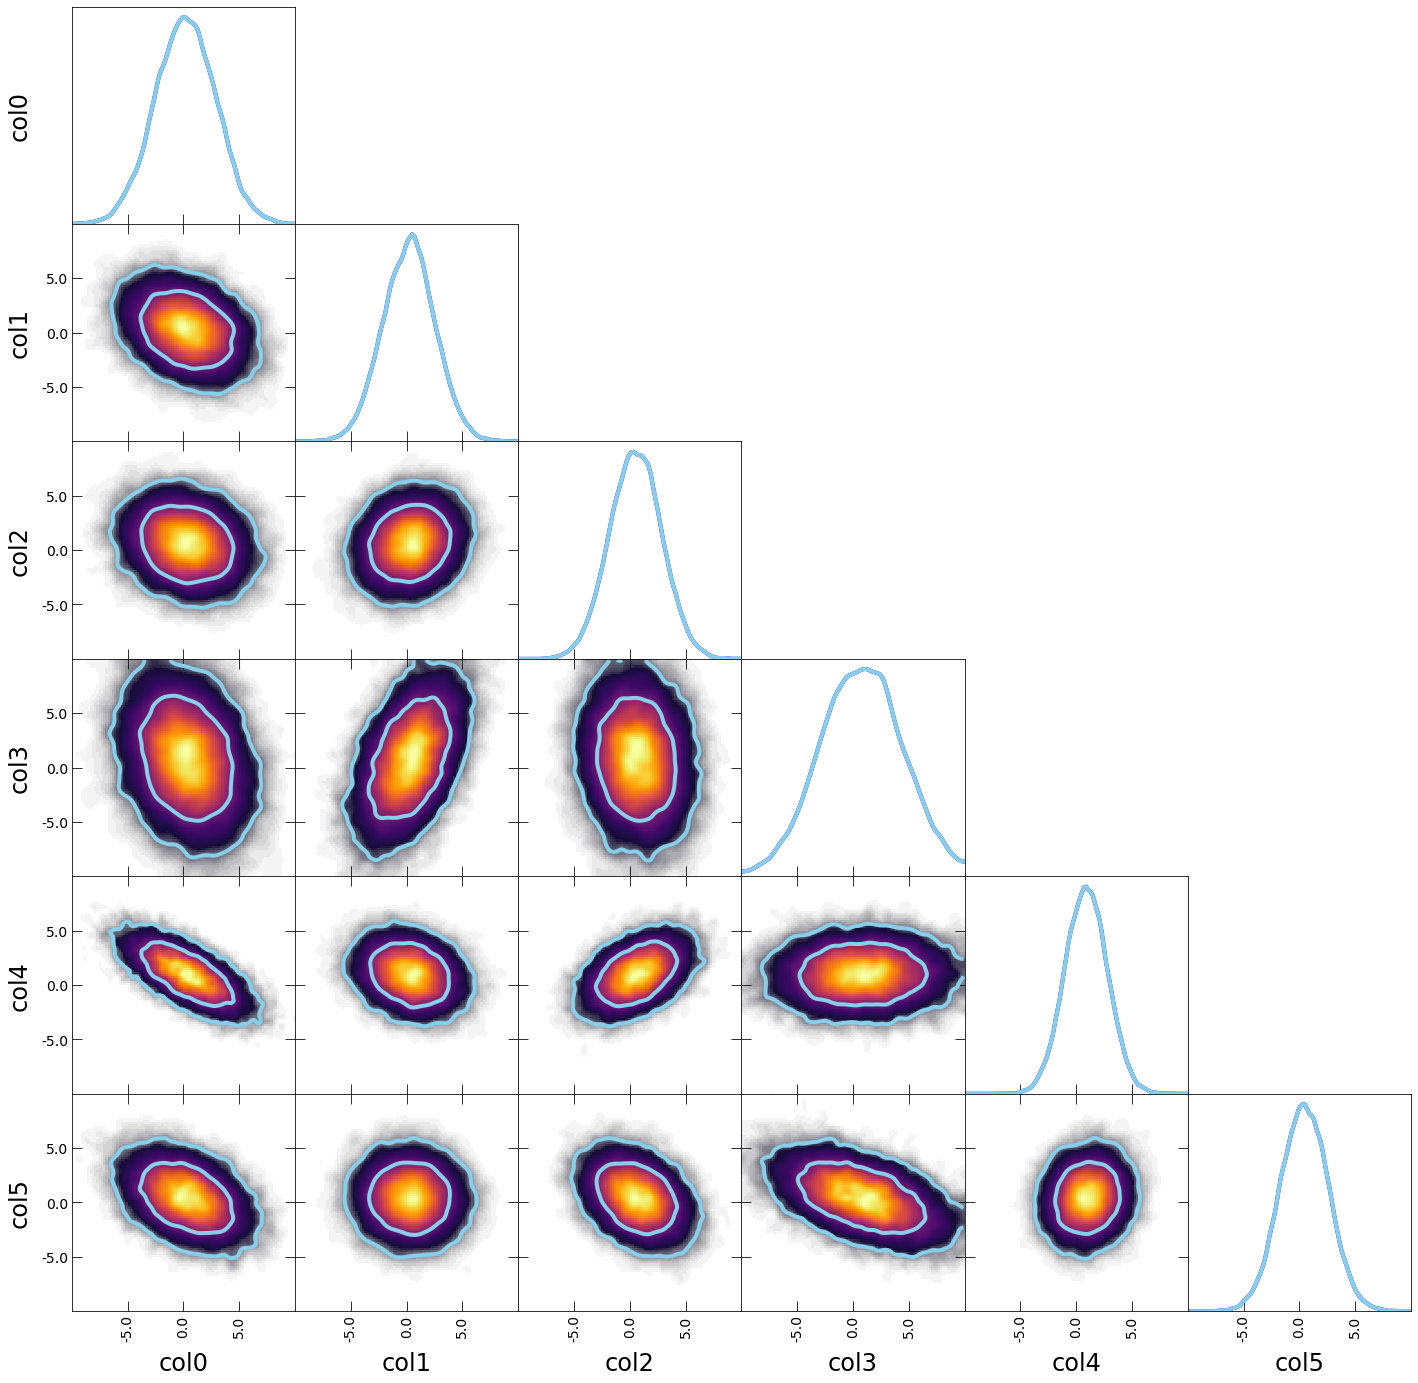

In [10]:
kwargs = {'alpha_for_low_density': True, #set low density values to alpha
          'alpha_threshold': 0.1} # how much of the cmap should be used for the transition to alpha
tri = TriangleChain(ranges=ranges,
                    **kwargs)
tri.density_image(samples1, cmap=plt.cm.inferno);
tri.contour_cl(samples1, color='skyblue');

# contour with fiducial values

  0%|          | 0/15 [00:00<?, ?it/s]

/Users/silvanfischbacher/miniforge3/envs/default/lib/python3.8/site-packages/scipy/signal/windows/_windows.py:1274: RuntimeWarning: divide by zero encountered in true_divide
  w = np.exp(-n ** 2 / sig2)
/Users/silvanfischbacher/miniforge3/envs/default/lib/python3.8/site-packages/scipy/signal/windows/_windows.py:1274: RuntimeWarning: invalid value encountered in true_divide
  w = np.exp(-n ** 2 / sig2)
/Users/silvanfischbacher/miniforge3/envs/default/lib/python3.8/site-packages/scipy/signal/windows/_windows.py:1274: RuntimeWarning: divide by zero encountered in true_divide
  w = np.exp(-n ** 2 / sig2)
/Users/silvanfischbacher/miniforge3/envs/default/lib/python3.8/site-packages/scipy/signal/windows/_windows.py:1274: RuntimeWarning: invalid value encountered in true_divide
  w = np.exp(-n ** 2 / sig2)
/Users/silvanfischbacher/miniforge3/envs/default/lib/python3.8/site-packages/scipy/signal/windows/_windows.py:1274: RuntimeWarning: divide by zero encountered in true_divide
  w = np.exp(-n 

  0%|          | 0/15 [00:00<?, ?it/s]

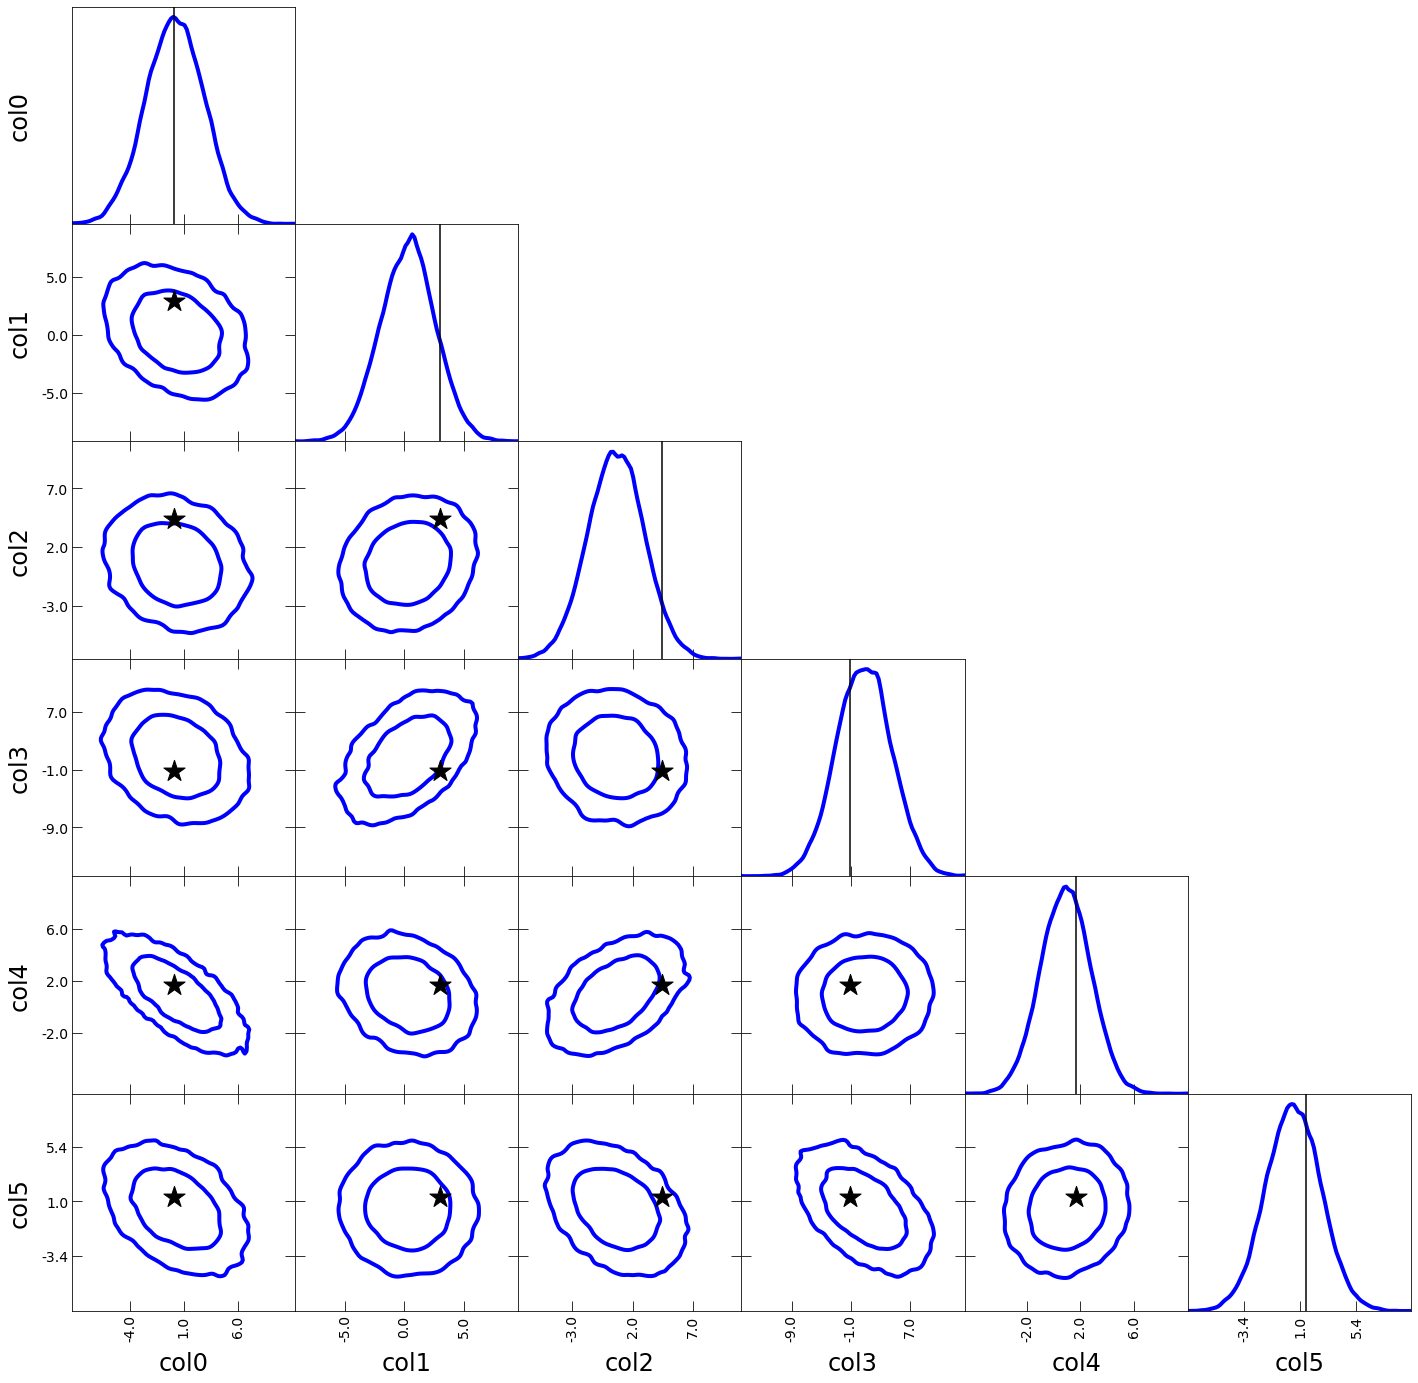

In [11]:
kwargs = {'scatter_kwargs':{'s':500, 'marker':'*', 'zorder':299}}
tri = TriangleChain(density_estimation_method='smoothing', **kwargs)
tri.contour_cl(samples1);
tri.scatter(samples1[0], color='black', plot_histograms_1D=False, scatter_vline_1D=True);